# WORKSHOP
# FACE WITH GLASS

**Name:** Chandrapriyadharshini C    
**Reg.No** 212223240019

In [142]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

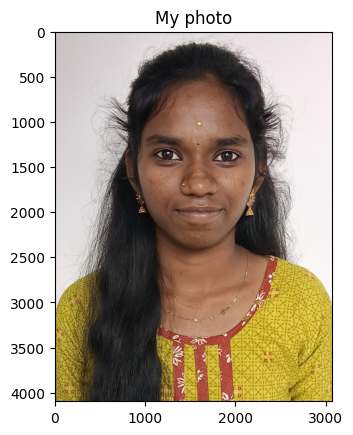

In [143]:
my_img=cv2.imread('pass port size photo.jpg')
plt.imshow(my_img[:,:,::-1])
plt.title("My photo")

plt.show()

In [144]:
my_img.shape

(4096, 3072, 3)

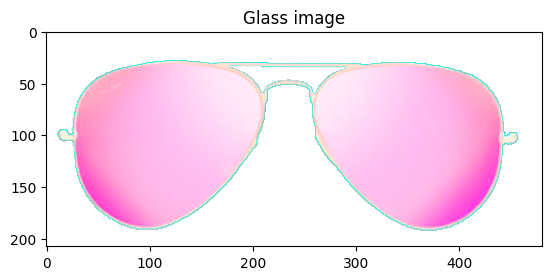

In [145]:
glass_img=cv2.imread('sunglass.png',-1)
plt.imshow(glass_img[:,:,::-1])
plt.title("Glass image")
plt.show()

In [146]:
glass_img.shape

(208, 481, 4)

In [147]:
glass_img=cv2.resize(glass_img,(1590,400))
print(f"Image Dimension = {glass_img.shape}")

Image Dimension = (400, 1590, 4)


In [148]:
glass_bgr=glass_img[:,:,0:3]
glass_mask=glass_img[:,:,3]
glass_bgr.shape


(400, 1590, 3)

In [149]:
glass_mask.shape

(400, 1590)

In [150]:
glass_h,glass_w=glass_bgr[:2]

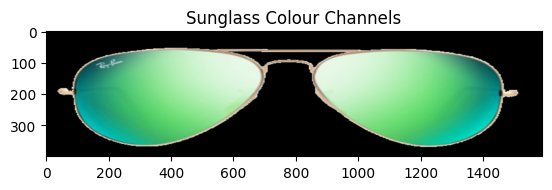

In [151]:
plt.imshow(glass_bgr[:,:,::-1])
plt.title("Sunglass Colour Channels")
plt.show()

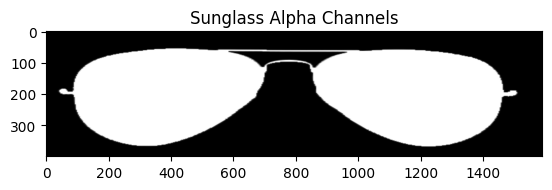

In [152]:
plt.imshow(glass_mask,cmap="gray")
plt.title("Sunglass Alpha Channels")
plt.show()

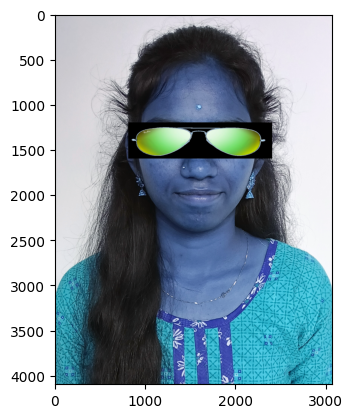

In [153]:
face_with_glass=my_img.copy()
face_with_glass[1200:1600,810:2400]=glass_bgr
plt.imshow(face_with_glass)

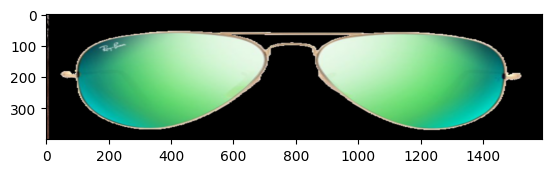

In [163]:
glass_h, glass_w = glass_bgr.shape[:2]   # height, width
glass_h, glass_w = int(glass_h), int(glass_w)  # just to be safe

x1, y1 = 800,1200
x2, y2 = int(x1 + glass_w), int(y1 + glass_h)

roi = face_with_glass[int(y1):int(y2), int(x1):int(x2)]
plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
plt.show()


Text(0.5, 1.0, 'Augmented Eye and Sunglass')

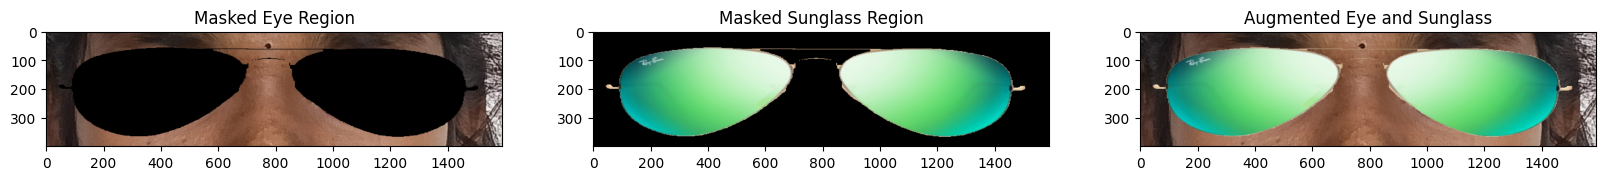

In [155]:
# Make the dimensions of the mask same as the input image.
# Since Face Image is a 3-channel image, we create a 3 channel image for the mask
glass_mask = cv2.merge((glass_mask,glass_mask,glass_mask))

# Make the values [0,1] since we are using arithmetic operations
glass_mask = np.uint8(glass_mask/255)

# Make a copy
faceWithGlassesArithmetic = my_img.copy()

# Get the eye region from the face image
eyeROI= faceWithGlassesArithmetic[1200:1600,810:2400]

# Use the mask to create the masked eye region
maskedEye = cv2.multiply(eyeROI,(1-  glass_mask ))

# Use the mask to create the masked sunglass region
maskedGlass = cv2.multiply(glass_bgr,glass_mask)

# Combine the Sunglass in the Eye Region to get the augmented image
eyeRoiFinal = cv2.add(maskedEye, maskedGlass)

# Display the intermediate results
plt.figure(figsize=[20,20])
plt.subplot(131);plt.imshow(maskedEye[...,::-1]);plt.title("Masked Eye Region")
plt.subplot(132);plt.imshow(maskedGlass[...,::-1]);plt.title("Masked Sunglass Region")
plt.subplot(133);plt.imshow(eyeRoiFinal[...,::-1]);plt.title("Augmented Eye and Sunglass")

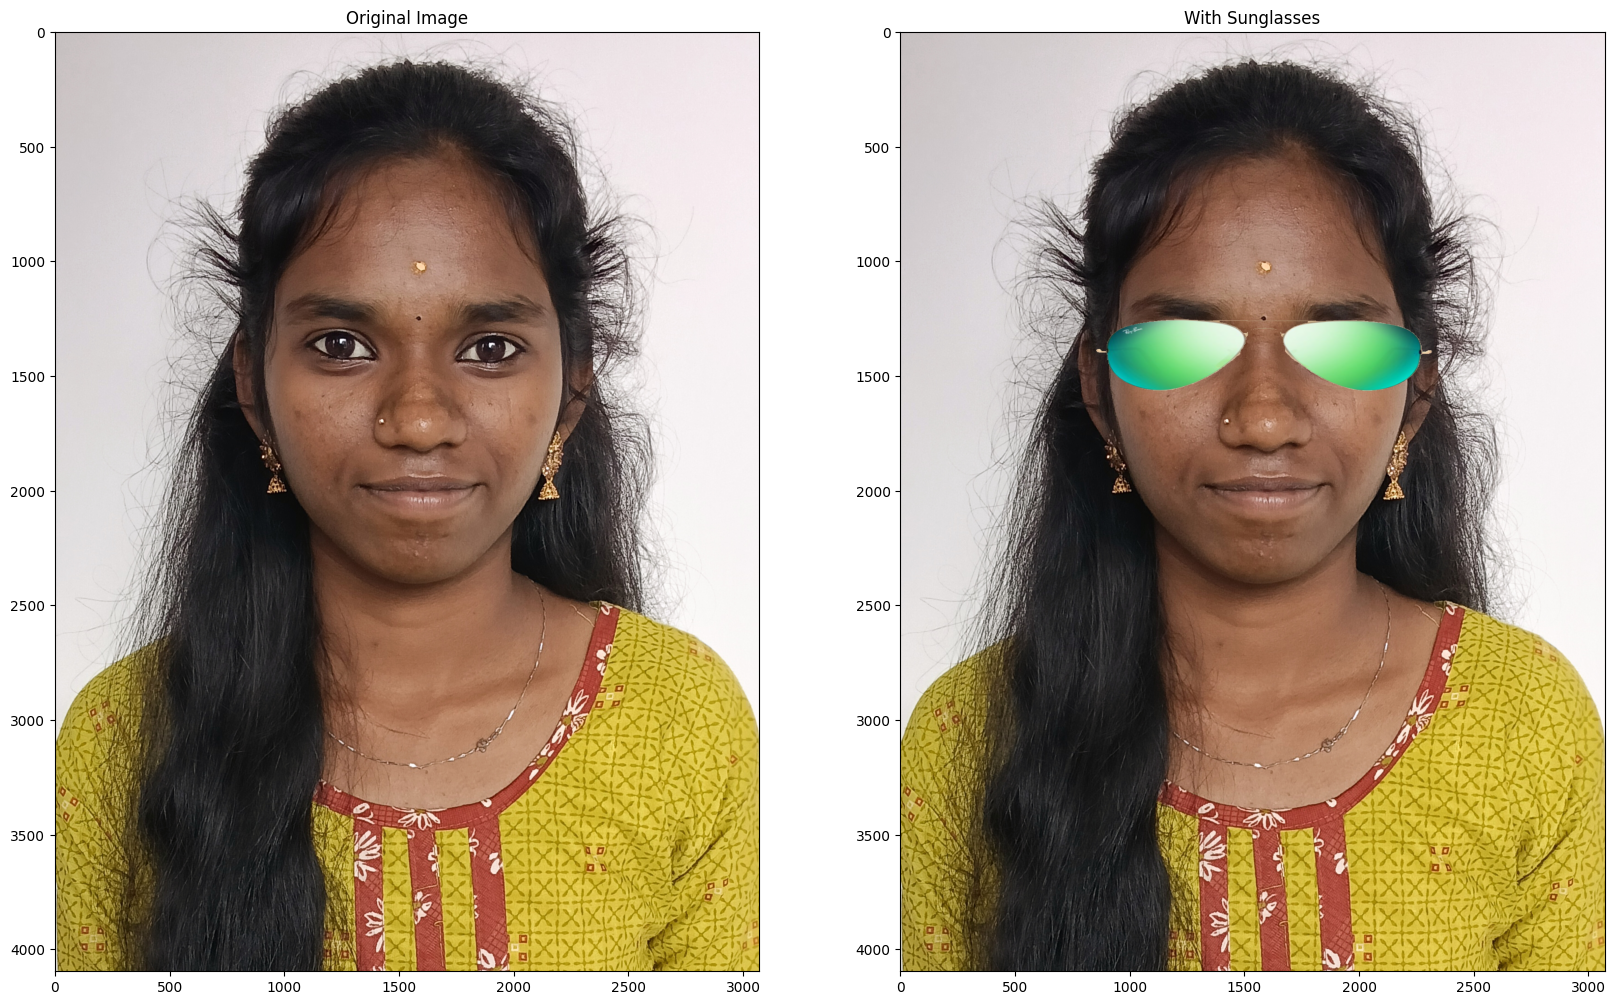

In [156]:
# Replace the eye ROI with the output from the previous section
faceWithGlassesArithmetic[1200:1600,810:2400]=eyeRoiFinal

# Display the final result
plt.figure(figsize=[20,20]);
plt.subplot(121);plt.imshow(my_img[:,:,::-1]); plt.title("Original Image");
plt.subplot(122);plt.imshow(faceWithGlassesArithmetic[:,:,::-1]);plt.title("With Sunglasses");